In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [3]:
data = pd.read_csv(r"/content/dataset.csv")
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
data.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [6]:
data.describe()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


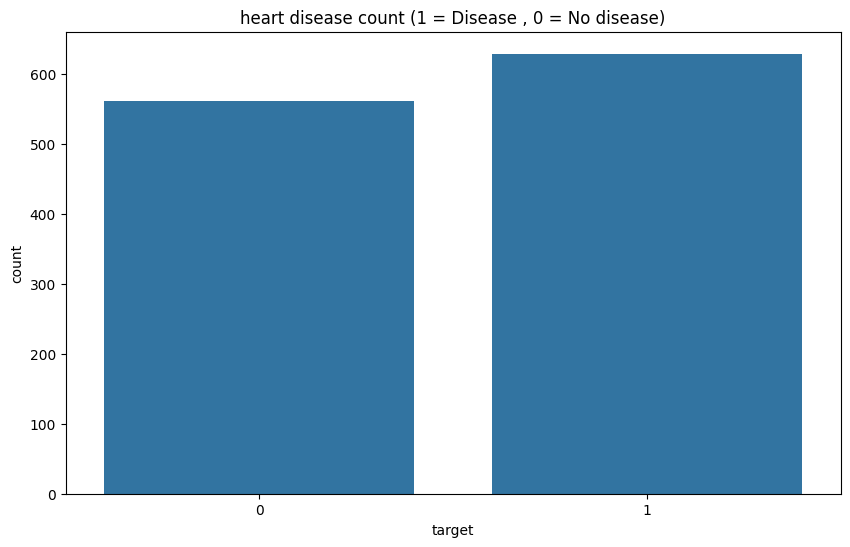

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x= "target" , data=data)
plt.title("heart disease count (1 = Disease , 0 = No disease)")
plt.show()

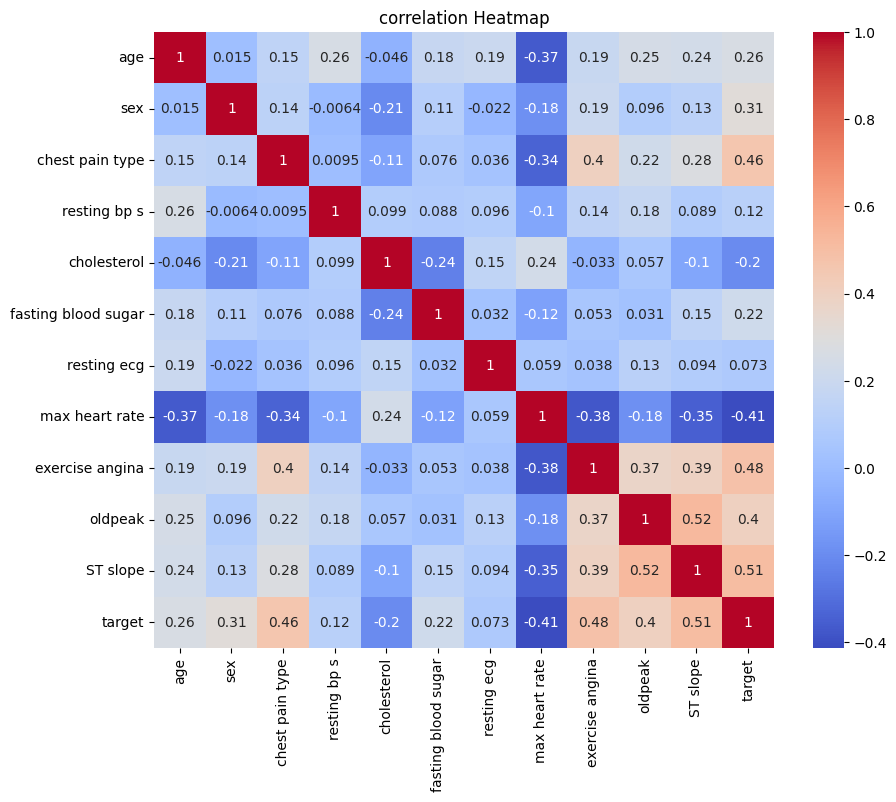

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap= "coolwarm")
plt.title("correlation Heatmap")
plt.show()

In [9]:
x = data.drop("target" , axis=1)
y = data["target"]


In [10]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2 , random_state=42)
print(f"\nTraining Samples: {x_train.shape[0]}, Testing Samples: {x_test.shape[0]}]")


Training Samples: 952, Testing Samples: 238]


In [11]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [12]:
model = LogisticRegression()
model.fit(x_train , y_train)
print("\n model Trained sucessfully")


 model Trained sucessfully


In [13]:
y_pred = model.predict(x_test)

print("\nAccuracy Score:" , accuracy_score(y_test , y_pred))
print("\nConfusion Matrix:\n" , confusion_matrix(y_test , y_pred))
print("\nClassification Report:\n" , classification_report(y_test , y_pred))


Accuracy Score: 0.8529411764705882

Confusion Matrix:
 [[ 91  16]
 [ 19 112]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       107
           1       0.88      0.85      0.86       131

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238



In [22]:
new_data = np.array([[60,1,4,100,248,0,0,125,0,1,2]])
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)

if prediction[0] == 1:
  print("\n 💔 The person is likely to have Heart Disease.")
else:
  print("\n❤️ The person is unlikely to have Heart Disease.")


 💔 The person is likely to have Heart Disease.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
new_data = np.array([[40,1,2,140,289,0,0,172,0,0,1]])
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)

if prediction[0] == 1:
  print("\n 💔 The person is likely to have Heart Disease.")
else:
  print("\n❤️ The person is unlikely to have Heart Disease.")


❤️ The person is unlikely to have Heart Disease.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
